In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("/content/National Universities Rankings.csv" , encoding='latin1')

In [7]:
df

,Name,Location,Rank,Description,Tuition and fees,In-state,Undergrad Enrollment
0,Princeton University,"Princeton, NJ",1,"Princeton, the fourth-oldest college in the Un...","$45,320",NaN,"5,402"
1,Harvard University,"Cambridge, MA",2,"Harvard is located in Cambridge, Massachusetts...","$47,074",NaN,"6,699"
2,University of Chicago,"Chicago, IL",3,"The University of Chicago, situated in Chicago...","$52,491",NaN,"5,844"
3,Yale University,"New Haven, CT",3,"Yale University, located in New Haven, Connect...","$49,480",NaN,"5,532"
4,Columbia University,"New York, NY",5,"Columbia University, located in Manhattan's Mo...","$55,056",NaN,"6,102"
...,...,...,...,...,...,...,...
226,University of Massachusetts--Dartmouth,"North Dartmouth, MA",220,"Located about 60 miles south of Boston, the Un...","$19,270","$12,588","7,295"
227,University of Missouri--St. Louis,"St. Louis, MO",220,Undergraduates at University of Missouri--St. ...,"$26,277","$10,065","13,569"
228,University of North Carolina--Greensboro,"Greensboro, NC",220,University of North Carolina--Greensboro is lo...,"$21,595","$6,733","15,951"
229,University of Southern Mississippi,"Hattiesburg, MS",220,The University of Southern Mississippi has two...,"$16,094","$7,224","11,840"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name                  231 non-null    object
 1   Location              231 non-null    object
 2   Rank                  231 non-null    int64 
 3   Description           231 non-null    object
 4   Tuition and fees      231 non-null    object
 5   In-state              133 non-null    object
 6   Undergrad Enrollment  231 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.8+ KB


In [9]:
df.duplicated().sum()

0

In [13]:
df['Tuition and fees'] = df['Tuition and fees'].str.replace('$' , '').str.replace(',' , '')

In [15]:
df['Undergrad Enrollment'] = df['Undergrad Enrollment'].str.replace(',' , '')

In [16]:
df

,Name,Location,Rank,Description,Tuition and fees,In-state,Undergrad Enrollment
0,Princeton University,"Princeton, NJ",1,"Princeton, the fourth-oldest college in the Un...",45320,NaN,5402
1,Harvard University,"Cambridge, MA",2,"Harvard is located in Cambridge, Massachusetts...",47074,NaN,6699
2,University of Chicago,"Chicago, IL",3,"The University of Chicago, situated in Chicago...",52491,NaN,5844
3,Yale University,"New Haven, CT",3,"Yale University, located in New Haven, Connect...",49480,NaN,5532
4,Columbia University,"New York, NY",5,"Columbia University, located in Manhattan's Mo...",55056,NaN,6102
...,...,...,...,...,...,...,...
226,University of Massachusetts--Dartmouth,"North Dartmouth, MA",220,"Located about 60 miles south of Boston, the Un...",19270,"$12,588",7295
227,University of Missouri--St. Louis,"St. Louis, MO",220,Undergraduates at University of Missouri--St. ...,26277,"$10,065",13569
228,University of North Carolina--Greensboro,"Greensboro, NC",220,University of North Carolina--Greensboro is lo...,21595,"$6,733",15951
229,University of Southern Mississippi,"Hattiesburg, MS",220,The University of Southern Mississippi has two...,16094,"$7,224",11840


In [18]:
df.describe()

,Rank
count,231.000000
mean,113.982684
std,65.995518
min,1.000000
25%,56.000000
50%,111.000000
75%,171.000000
max,220.000000


In [38]:
df['University'] = np.nan

df.loc[df['Name'].str.contains('University') , 'University'] = 'University'
df.loc[df['Name'].str.contains('School') , 'University'] = 'School'
df.loc[df['Name'].str.contains('College') , 'University'] = 'College'
df.loc[df['Name'].str.contains('Institute') , 'University'] = 'Institute'
df.loc[df['Description'].str.contains('institute') , 'University'] = 'Institute'


In [55]:
df['In-state'] = df['In-state'].str.replace('$' , '').str.replace(',' , '')

In [66]:
df['Location'] = df['Location'].str.split(',').str.get(0)

In [67]:
df

,Name,Location,Rank,Description,Tuition and fees,In-state,Undergrad Enrollment,University
0,Princeton University,Princeton,1,"Princeton, the fourth-oldest college in the Un...",45320,NaN,5402,University
1,Harvard University,Cambridge,2,"Harvard is located in Cambridge, Massachusetts...",47074,NaN,6699,University
2,University of Chicago,Chicago,3,"The University of Chicago, situated in Chicago...",52491,NaN,5844,University
3,Yale University,New Haven,3,"Yale University, located in New Haven, Connect...",49480,NaN,5532,University
4,Columbia University,New York,5,"Columbia University, located in Manhattan's Mo...",55056,NaN,6102,University
...,...,...,...,...,...,...,...,...
226,University of Massachusetts--Dartmouth,North Dartmouth,220,"Located about 60 miles south of Boston, the Un...",19270,12588,7295,University
227,University of Missouri--St. Louis,St. Louis,220,Undergraduates at University of Missouri--St. ...,26277,10065,13569,University
228,University of North Carolina--Greensboro,Greensboro,220,University of North Carolina--Greensboro is lo...,21595,6733,15951,University
229,University of Southern Mississippi,Hattiesburg,220,The University of Southern Mississippi has two...,16094,7224,11840,University


#EDA

# Total Universities ?

<Axes: xlabel='University'>

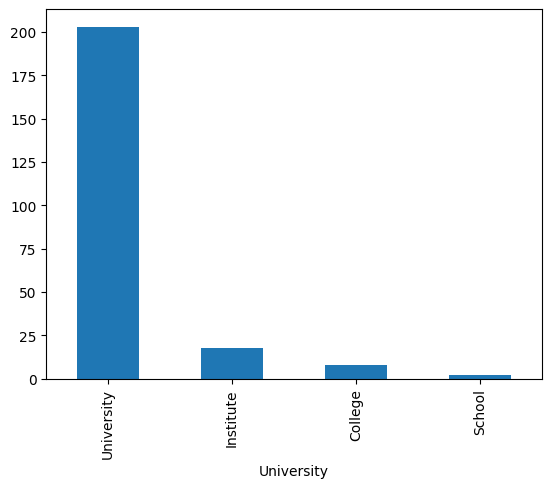

In [60]:
df['University'].value_counts().plot(kind='bar')

# Top 15 Location with the Highest number of Universities

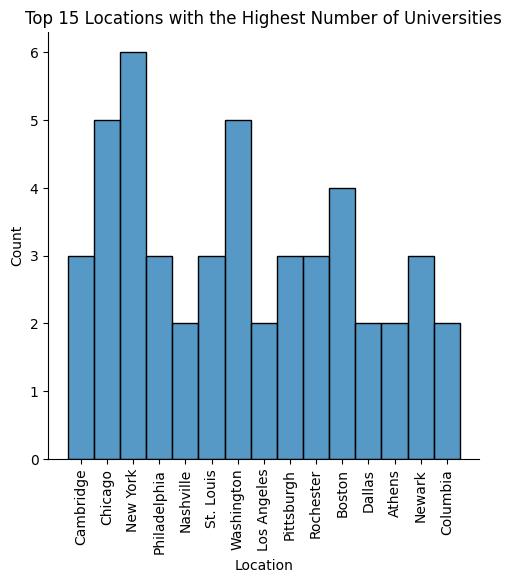

In [101]:
top_location = df['Location'].value_counts().head(15).index.tolist()

filtered = df[df['Location'].isin(top_location)]

sns.displot(data=filtered , x='Location')
plt.title('Top 15 Locations with the Highest Number of Universities')
plt.xticks(rotation=90)
plt.show()

# Number of Universities in Top 15 Locations

In [181]:
a = df['Location'].value_counts().head(15).index.tolist()

filtered = df[df['Location'].isin(a)]
unique_universities = filtered['Name'].unique()
unique_universities

array(['Harvard University', 'University of Chicago',
       'Columbia University', 'Massachusetts Institute of Technology',
       'University of Pennsylvania', 'Vanderbilt University',
       'Washington University in St. Louis', 'Georgetown University',
       'University of Southern California', 'Carnegie Mellon University',
       'University of California--Los Angeles', 'University of Rochester',
       'New York University', 'Boston University',
       'Northeastern University', 'George Washington University',
       'Southern Methodist University', 'University of Georgia',
       'Fordham University', 'Yeshiva University',
       'University of Pittsburgh', 'American University',
       'University of Delaware', 'Drexel University',
       'Saint Louis University', 'Loyola University Chicago',
       'Illinois Institute of Technology',
       'Rochester Institute of Technology',
       'University of South Carolina', 'University of Missouri',
       'Temple University', 'The Ca

<Figure size 1000x600 with 0 Axes>

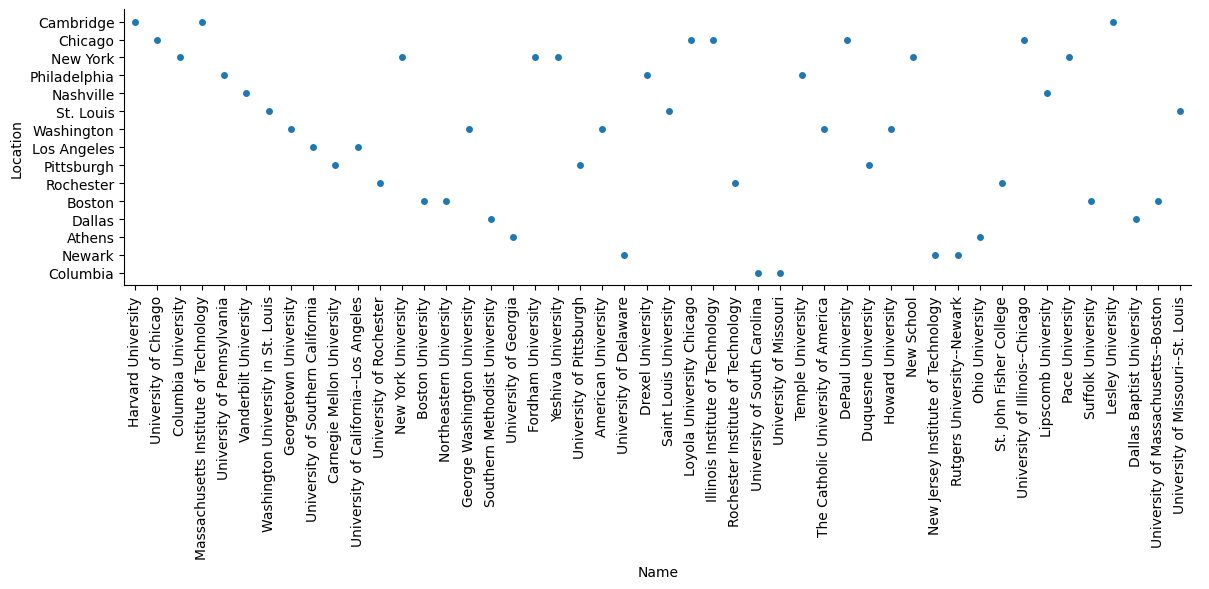

In [182]:
plt.figure(figsize=(10, 6))
sns.catplot(data=filtered , x='Name' , y="Location", height=6, aspect=2)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Top 15 Location with Tuition and Fees

In [127]:
tution_fees = filtered['Tuition and fees'].unique()

<Figure size 500x400 with 0 Axes>

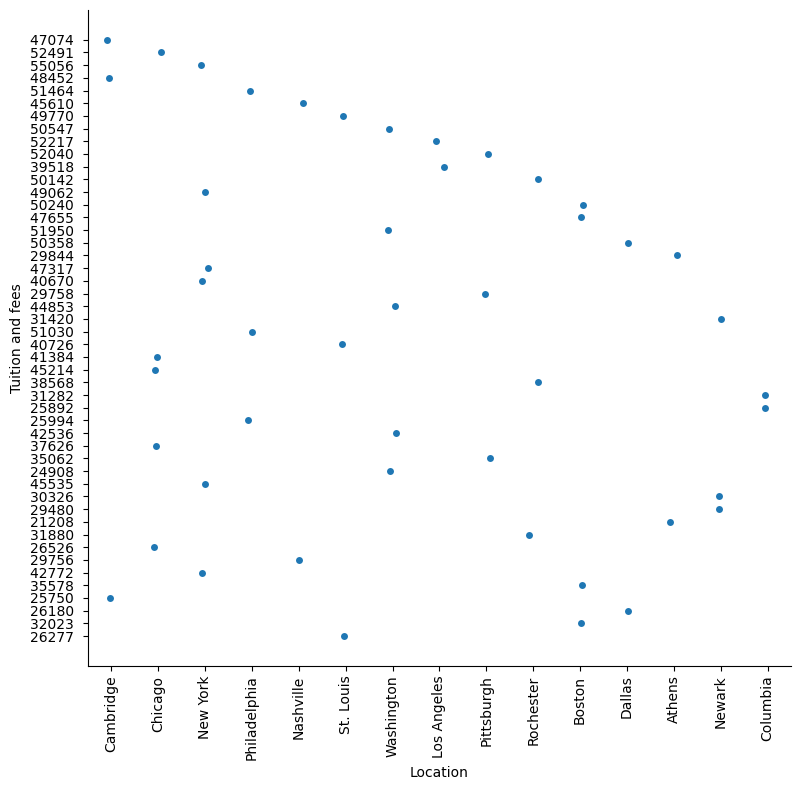

In [133]:
plt.figure(figsize=(5, 4))
sns.catplot(data=filtered , y='Tuition and fees' , x="Location", height=8, aspect=1)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Top 15 Universities with Location And their Tuition Fees

<Figure size 1000x1000 with 0 Axes>

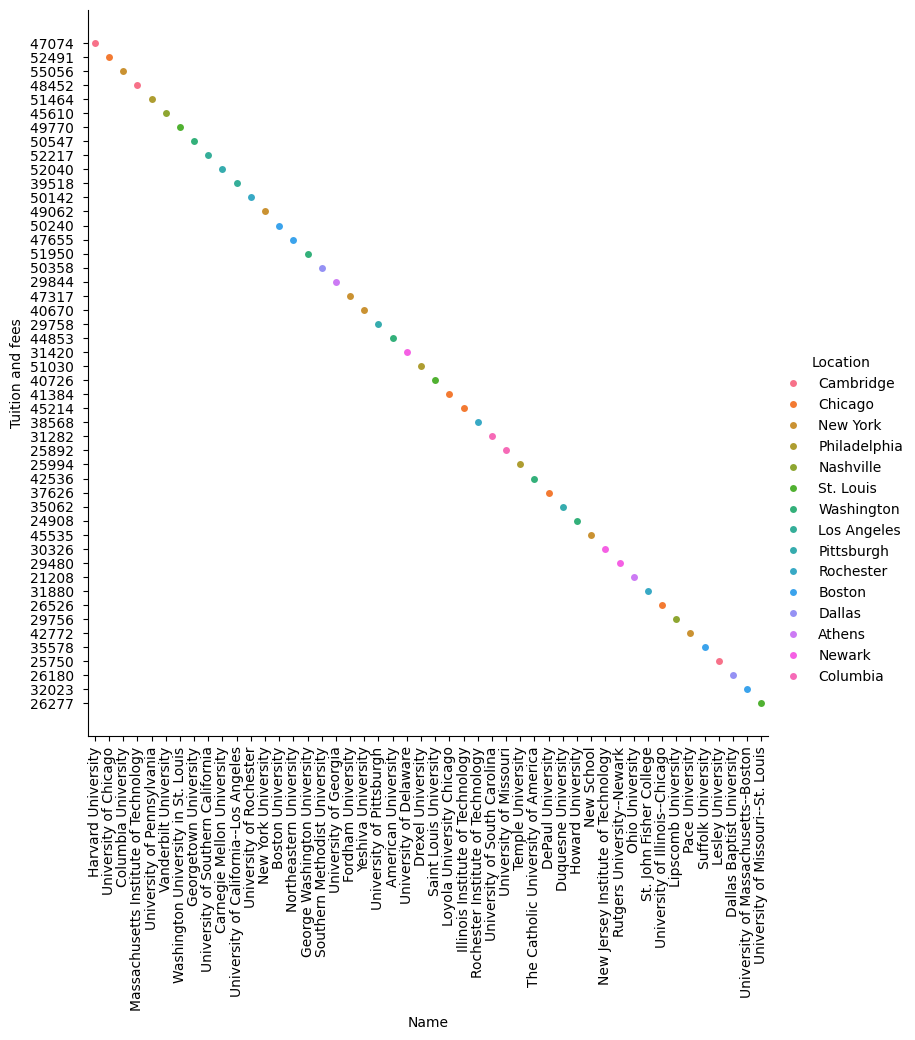

In [143]:
plt.figure(figsize=(10, 10))
sns.catplot(data=filtered , x='Name' ,y='Tuition and fees' , hue="Location", height=8, aspect=1)
plt.xticks(rotation=90)
# plt.tight_layout()
plt.show()

# Top 15 Universities with Location and their number of  Graduate Students

<Figure size 1000x1000 with 0 Axes>

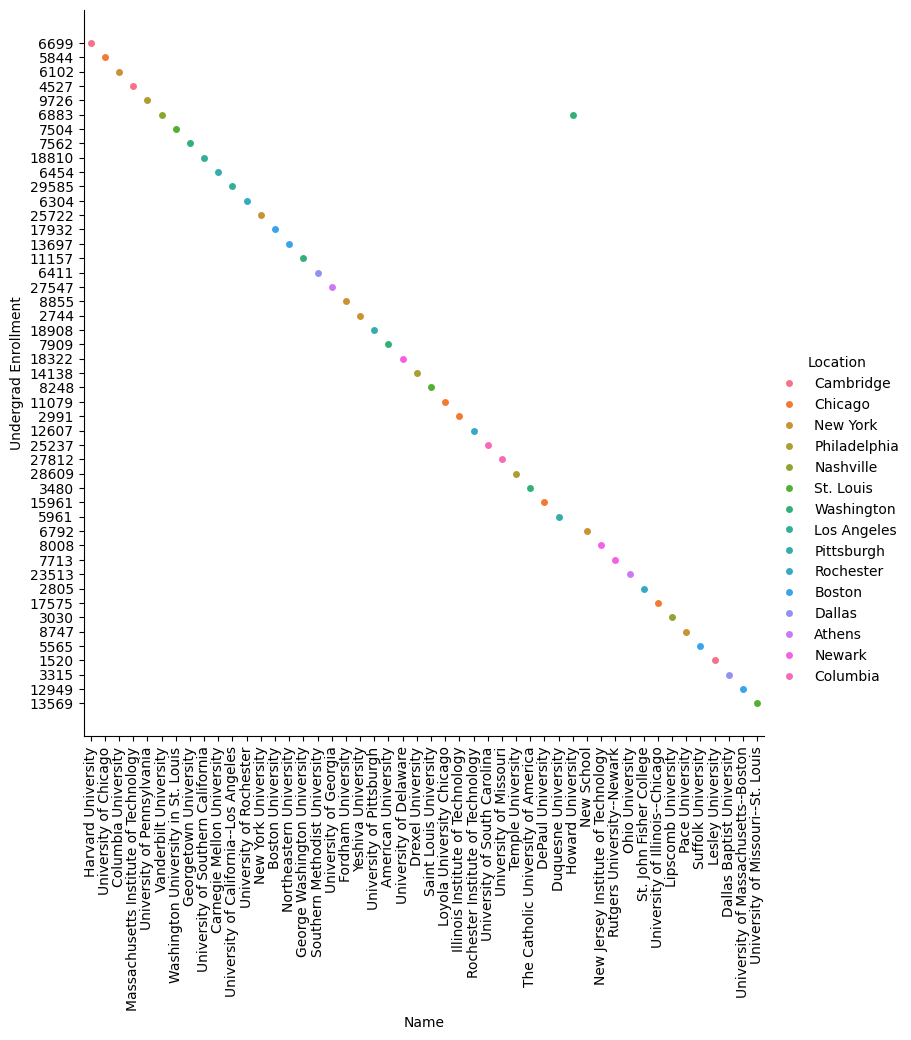

In [145]:
plt.figure(figsize=(10, 10))
sns.catplot(data=filtered , x='Name' ,y='Undergrad Enrollment' , hue="Location", height=8, aspect=1)
plt.xticks(rotation=90)
# plt.tight_layout()
plt.show()

# Top 15 Lowest rank Universities

In [149]:
lowest_rank = df['Rank'].value_counts().head(15).index.tolist()

In [153]:

lowest_rank = df['Rank'].value_counts().head(15).index.tolist()

filtered = df[df['Rank'].isin(lowest_rank)]

unique_universities = filtered['Name'].unique()



<Figure size 1000x1000 with 0 Axes>

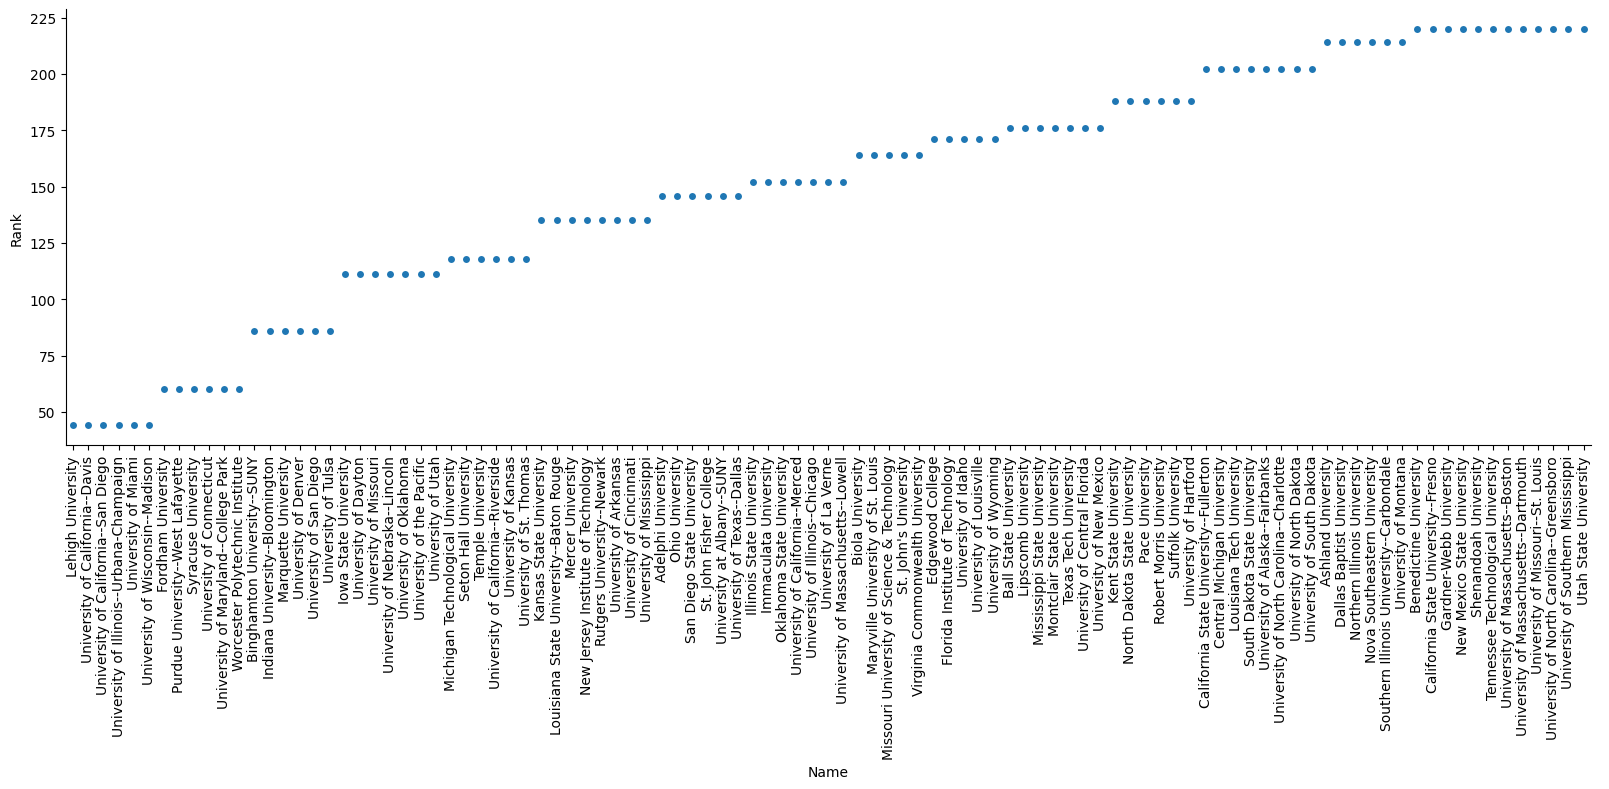

In [160]:
plt.figure(figsize=(10, 10))
sns.catplot(data=filtered , x='Name' ,y='Rank' , height=8, aspect=2)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Top 15 Highest Universities Rank

<Figure size 1000x800 with 0 Axes>

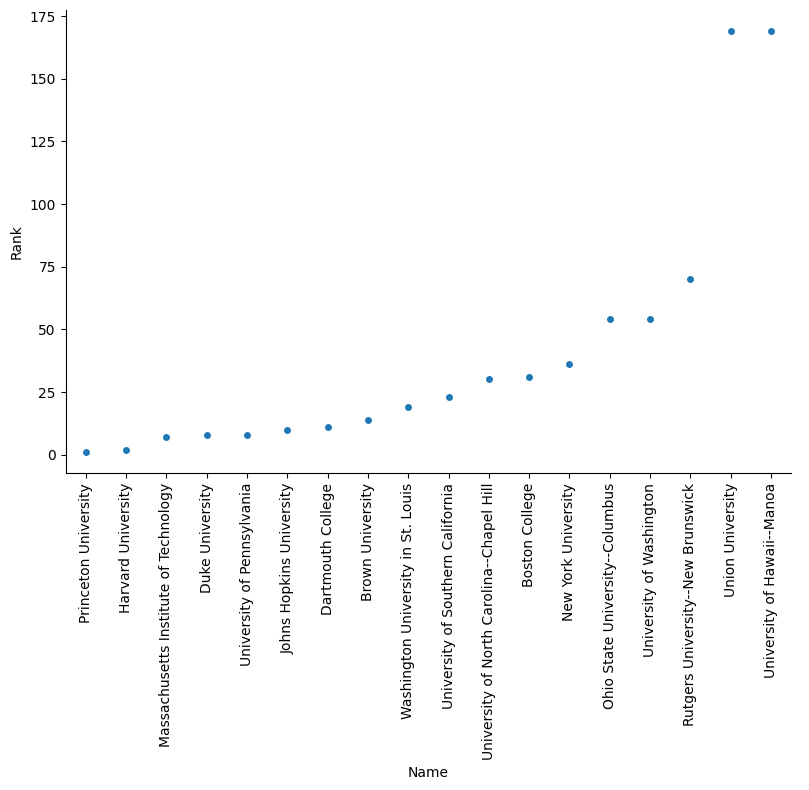

In [165]:

highest_rank = df['Rank'].value_counts().tail(15).index.tolist()

filtered = df[df['Rank'].isin(highest_rank)]

unique_universities = filtered['Name'].unique()

plt.figure(figsize=(10, 8))
sns.catplot(data=filtered , x='Name' ,y='Rank' , height=8, aspect=1)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Most used words in Description about Universities

In [170]:
df['Description'].loc[5]

'Stanford University\'s pristine campus is located in California\'s Bay Area, about 30 miles from San Francisco. Stanford offers a wide range of student organizations, including the Stanford Pre-Business Association and Stanford Solar Car Project, which designs, builds and races a solar car every two years. The Stanford Cardinals are well known for the traditional "Big Game" against Cal, an annual football competition that awards the Stanford Axe--a sought-after trophy--to the victor. Stanford also has successful programs in tennis and golf. Only freshman are required to live on campus, but students are guaranteed housing for all four years and most choose to remain on campus. Greek life at Stanford represents approximately 10 percent of the student body. '

In [172]:
from wordcloud import WordCloud

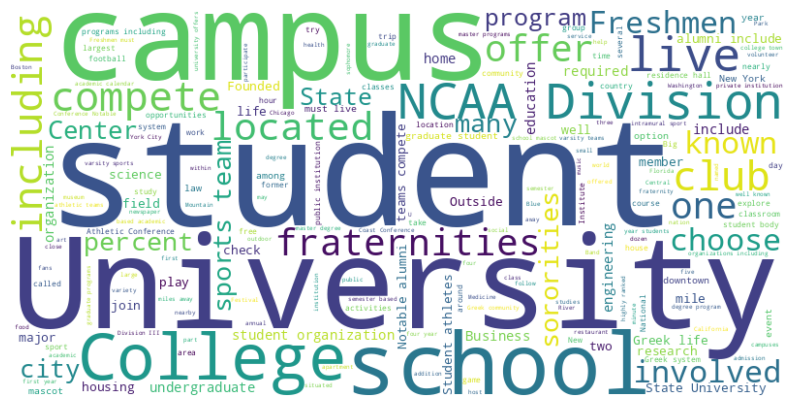

In [173]:
text_col = df["Description"]

text = ' '.join(text_col)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()